In [10]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


packet_size = [10,20,50,100]
size = 10

df = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/Packet CSV files/packet{size}.csv")
#print(df.head())
print(df['Profit'])

X = df.drop(columns=['Profit'])
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

print("finished")

0        -0.009172
1        -0.010322
2        -0.005889
3        -0.007114
4        -0.006814
            ...   
104709    0.000443
104710   -0.000780
104711   -0.000468
104712   -0.000312
104713   -0.000624
Name: Profit, Length: 104714, dtype: float64
finished


# Test with 20 Packets

0        -0.009172
1        -0.010322
2        -0.005889
3        -0.007114
4        -0.006814
            ...   
104709    0.000443
104710   -0.000780
104711   -0.000468
104712   -0.000312
104713   -0.000624
Name: Profit, Length: 104714, dtype: float64
finished
[0]	test-rmse:0.00305
[1]	test-rmse:0.00304
[2]	test-rmse:0.00304
[3]	test-rmse:0.00303
[4]	test-rmse:0.00303
[5]	test-rmse:0.00302
[6]	test-rmse:0.00302
[7]	test-rmse:0.00302
[8]	test-rmse:0.00302
[9]	test-rmse:0.00301
[10]	test-rmse:0.00301
[11]	test-rmse:0.00301
[12]	test-rmse:0.00301
[13]	test-rmse:0.00300
[14]	test-rmse:0.00300
[15]	test-rmse:0.00300
[16]	test-rmse:0.00299
[17]	test-rmse:0.00299
[18]	test-rmse:0.00299
[19]	test-rmse:0.00299
[20]	test-rmse:0.00299
[21]	test-rmse:0.00298
[22]	test-rmse:0.00298
[23]	test-rmse:0.00298
[24]	test-rmse:0.00298
[25]	test-rmse:0.00298
[26]	test-rmse:0.00298
[27]	test-rmse:0.00298
[28]	test-rmse:0.00298
[29]	test-rmse:0.00297
[30]	test-rmse:0.00297
[31]	test-rmse:0.00297
[32]	test-r

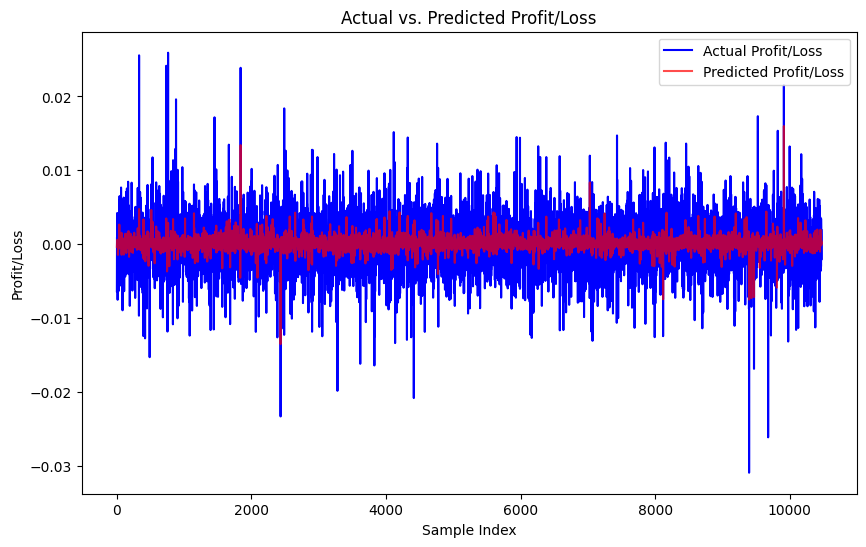

In [14]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


packet_size = [10,20,50,100]
size = 20

df = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/Packet CSV files/packet{size}.csv")
#print(df.head())
print(df['Profit'])

X = df.drop(columns=['Profit'])
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

print("finished")

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8
}

# Train the model
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=100, 
                  evals=[(dtest, 'test')], 
                  early_stopping_rounds=10)

# Make predictions
predictions = model.predict(dtest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Profit/Loss', color='blue')
plt.plot(predictions, label='Predicted Profit/Loss', color='red', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Profit/Loss')
plt.title('Actual vs. Predicted Profit/Loss')
plt.legend()
plt.show()

# Test with 50 packets

0        -0.009172
1        -0.010322
2        -0.005889
3        -0.007114
4        -0.006814
            ...   
104709    0.000443
104710   -0.000780
104711   -0.000468
104712   -0.000312
104713   -0.000624
Name: Profit, Length: 104714, dtype: float64
finished
[0]	test-rmse:0.00303
[1]	test-rmse:0.00301
[2]	test-rmse:0.00299
[3]	test-rmse:0.00297
[4]	test-rmse:0.00295
[5]	test-rmse:0.00293
[6]	test-rmse:0.00291
[7]	test-rmse:0.00290
[8]	test-rmse:0.00288
[9]	test-rmse:0.00287
[10]	test-rmse:0.00285
[11]	test-rmse:0.00284
[12]	test-rmse:0.00282
[13]	test-rmse:0.00281
[14]	test-rmse:0.00280
[15]	test-rmse:0.00278
[16]	test-rmse:0.00277
[17]	test-rmse:0.00276
[18]	test-rmse:0.00275
[19]	test-rmse:0.00275
[20]	test-rmse:0.00274
[21]	test-rmse:0.00273
[22]	test-rmse:0.00272
[23]	test-rmse:0.00271
[24]	test-rmse:0.00271
[25]	test-rmse:0.00270
[26]	test-rmse:0.00269
[27]	test-rmse:0.00269
[28]	test-rmse:0.00268
[29]	test-rmse:0.00267
[30]	test-rmse:0.00267
[31]	test-rmse:0.00266
[32]	test-r

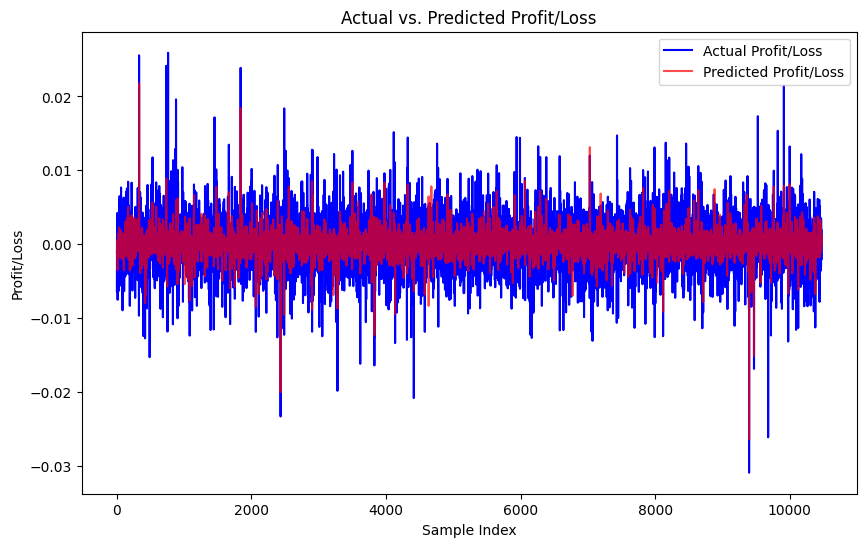

In [20]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


packet_size = [10,20,50,100]
size = 50

df = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/Packet CSV files/packet{size}.csv")
#print(df.head())
print(df['Profit'])

X = df.drop(columns=['Profit'])
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

print("finished")

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.05,
    'max_depth': 15,
    'subsample': 1
}

# Train the model
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=100, 
                  evals=[(dtest, 'test')], 
                  early_stopping_rounds=10)

# Make predictions
predictions = model.predict(dtest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Profit/Loss', color='blue')
plt.plot(predictions, label='Predicted Profit/Loss', color='red', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Profit/Loss')
plt.title('Actual vs. Predicted Profit/Loss')
plt.legend()
plt.show()

# Test with 100 Packets

C:\Users\rybot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [01:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	test-rmse:0.00299
[1]	test-rmse:0.00295
[2]	test-rmse:0.00290
[3]	test-rmse:0.00286
[4]	test-rmse:0.00283
[5]	test-rmse:0.00280
[6]	test-rmse:0.00279
[7]	test-rmse:0.00276
[8]	test-rmse:0.00275
[9]	test-rmse:0.00273
[10]	test-rmse:0.00271
[11]	test-rmse:0.00269
[12]	test-rmse:0.00268
[13]	test-rmse:0.00267
[14]	test-rmse:0.00266
[15]	test-rmse:0.00265
[16]	test-rmse:0.00264
[17]	test-rmse:0.00263
[18]	test-rmse:0.00261
[19]	test-rmse:0.00260
[20]	test-rmse:0.00259
[21]	test-rmse:0.00257
[22]	test-rmse:0.00256
[23]	test-rmse:0.00256
[24]	test-rmse:0.00255
[25]	test-rmse:0.00254
[26]	test-rmse:0.00253
[27]	test-rmse:0.00252
[28]	test-rmse:0.00251
[29]	test-rmse:0.00250
[30]	test-rmse:0.00249
[31]	test-rmse:0.00248
[32]	test-rmse:0.00248
[33]	test-rmse:0.00248
[34]	test-rmse:0.00246
[35]	test-rmse:0.00246
[36]	test-rmse:0.00245
[37]	test-rmse:0.00244
[38]	test-rmse:0.00243
[39]	test-rmse:0.00243
[40]	test-rmse:0.00241
[41]	test-rmse:0.00241
[42]	test-rmse:0.00240
[43]	test-rmse:0.0023

Exception ignored in: <function ZipFile.__del__ at 0x00000257FD2F3B00>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\zipfile.py", line 1894, in __del__
    self.close()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\zipfile.py", line 1911, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
Exception ignored in: <function ZipFile.__del__ at 0x00000257FD2F3B00>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\zipfile.py", line 1894, in __del__
    self.close()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\zipfile.py", line 1911, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
Exception ignored in: <function ZipFile.__del__ at 0

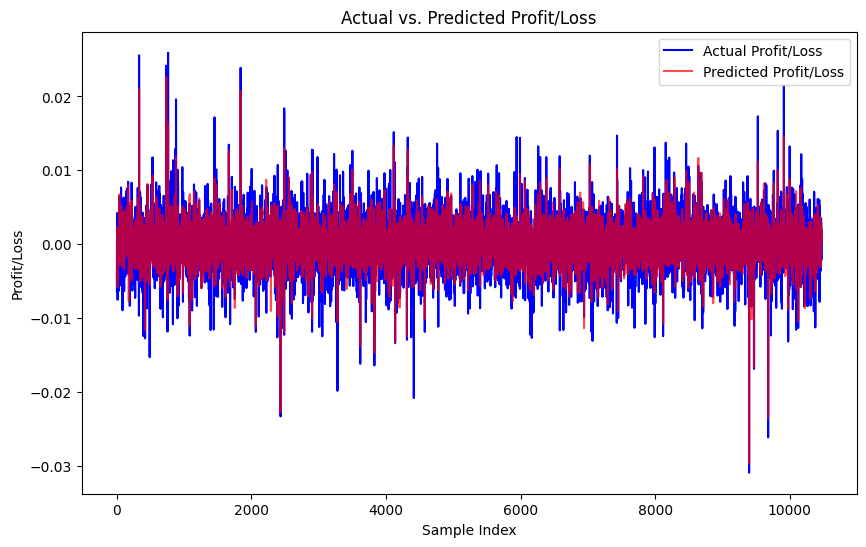

In [19]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


packet_size = [10,20,50,100]
size = 100

df = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/Packet CSV files/packet{size}.csv")
#print(df.head())

X = df.drop(columns=['Profit'])
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'colsample_bytree': 0.6,
    'gamma': 0,
    'learning_rate': 0.2,
    'max_depth': 10,
    'min_child_weight': 3,
    'n_estimators': 300,
    'subsample': 0.8
}


# Train the model
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=300, 
                  evals=[(dtest, 'test')], 
                  early_stopping_rounds=10)

# Make predictions
predictions = model.predict(dtest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

results_df = pd.DataFrame({
    'Actual Profit/Loss': y_test.values,
    'Predicted Profit/Loss': predictions,
    'RMSE': [rmse] * len(y_test)  # Repeat the RMSE value for each row
})

# Display the DataFrame
with pd.ExcelWriter('results100packet.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Sheet1', index=False)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Profit/Loss', color='blue')
plt.plot(predictions, label='Predicted Profit/Loss', color='red', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Profit/Loss')
plt.title('Actual vs. Predicted Profit/Loss')
plt.legend()
plt.show()

# Test with 100 Packets less the TA

0        -0.009172
1        -0.010322
2        -0.005889
3        -0.007114
4        -0.006814
            ...   
104709    0.000443
104710   -0.000780
104711   -0.000468
104712   -0.000312
104713   -0.000624
Name: Profit, Length: 104714, dtype: float64
finished
[0]	test-rmse:0.00304
[1]	test-rmse:0.00303
[2]	test-rmse:0.00302
[3]	test-rmse:0.00300
[4]	test-rmse:0.00300
[5]	test-rmse:0.00299
[6]	test-rmse:0.00298
[7]	test-rmse:0.00298
[8]	test-rmse:0.00297
[9]	test-rmse:0.00296
[10]	test-rmse:0.00295
[11]	test-rmse:0.00295
[12]	test-rmse:0.00294
[13]	test-rmse:0.00294
[14]	test-rmse:0.00293
[15]	test-rmse:0.00293
[16]	test-rmse:0.00292
[17]	test-rmse:0.00292
[18]	test-rmse:0.00292
[19]	test-rmse:0.00291
[20]	test-rmse:0.00291
[21]	test-rmse:0.00291
[22]	test-rmse:0.00291
[23]	test-rmse:0.00290
[24]	test-rmse:0.00290
[25]	test-rmse:0.00290
[26]	test-rmse:0.00289
[27]	test-rmse:0.00289
[28]	test-rmse:0.00289
[29]	test-rmse:0.00289
[30]	test-rmse:0.00289
[31]	test-rmse:0.00288
[32]	test-r

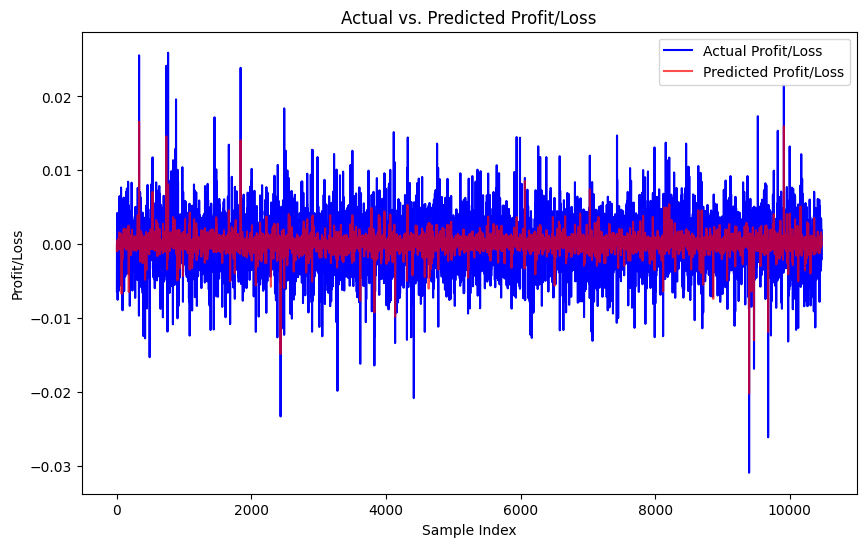

In [18]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


packet_size = [10,20,50,100]
size = 100

df = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/Packet CSV files/packet{size}.csv")
#print(df.head())
print(df['Profit'])

X = df.drop(columns=['Profit','EMA100','EMA20','RSI'])
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

print("finished")

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8
}

# Train the model
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=100, 
                  evals=[(dtest, 'test')], 
                  early_stopping_rounds=10)

# Make predictions
predictions = model.predict(dtest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Profit/Loss', color='blue')
plt.plot(predictions, label='Predicted Profit/Loss', color='red', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Profit/Loss')
plt.title('Actual vs. Predicted Profit/Loss')
plt.legend()
plt.show()

# Grid Search on 100 Packets with TA
#### Grid Search didn't work

Starting GridSearchCV...
Fitting 3 folds for each of 5184 candidates, totalling 15552 fits
Best Parameters from GridSearchCV: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.8}
RMSE from GridSearchCV: 0.001763998533602071


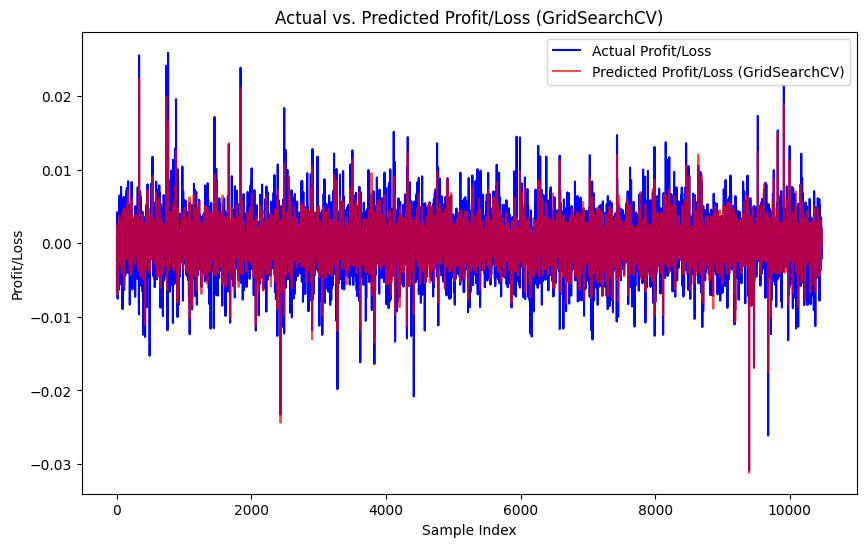

Starting RandomizedSearchCV...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters from RandomizedSearchCV: {'colsample_bytree': 0.7704365900187764, 'gamma': 0.08903056702841222, 'learning_rate': 0.12899548058627555, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 104, 'subsample': 0.8053304674769571}
RMSE from RandomizedSearchCV: 0.0030554096710956108


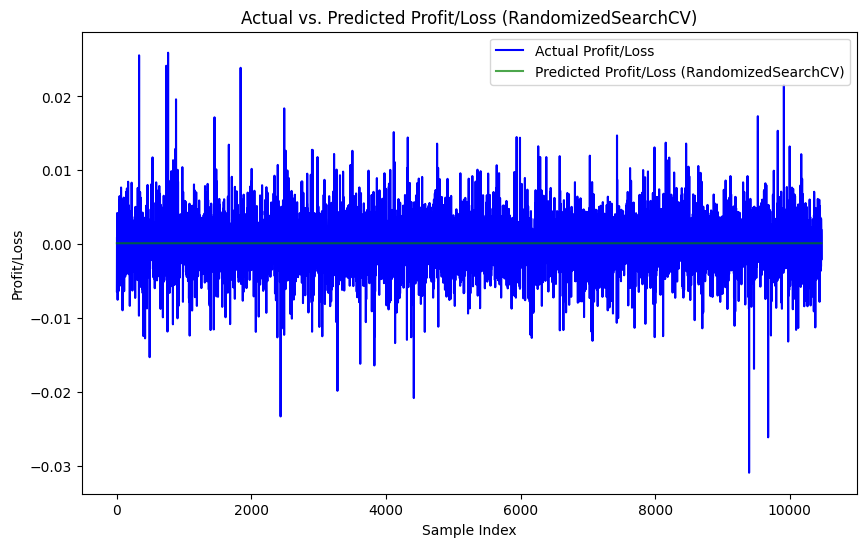

In [1]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from scipy.stats import uniform, randint

# Load the data
packet_size = [10, 20, 50, 100]
size = 100

df = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/Packet CSV files/packet{size}.csv")

X = df.drop(columns=['Profit'])
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Set up the model
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'learning_rate': uniform(0.01, 0.3),  # Uniform distribution between 0.01 and 0.3
    'max_depth': randint(3, 11),  # Random integer between 3 and 10
    'min_child_weight': randint(1, 10),  # Random integer between 1 and 10
    'subsample': uniform(0.6, 0.4),  # Uniform distribution between 0.6 and 1.0
    'colsample_bytree': uniform(0.6, 0.4),  # Uniform distribution between 0.6 and 1.0
    'n_estimators': randint(100, 500),  # Random integer between 100 and 500
    'gamma': uniform(0, 0.4)  # Uniform distribution between 0 and 0.4
}

# --- Grid Search CV ---
print("Starting GridSearchCV...")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
best_model_grid = grid_search.best_estimator_

# Evaluate the GridSearchCV model
predictions_grid = best_model_grid.predict(X_test)
rmse_grid = np.sqrt(mean_squared_error(y_test, predictions_grid))
print(f"RMSE from GridSearchCV: {rmse_grid}")

# Plot actual vs. predicted values for GridSearchCV
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Profit/Loss', color='blue')
plt.plot(predictions_grid, label='Predicted Profit/Loss (GridSearchCV)', color='red', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Profit/Loss')
plt.title('Actual vs. Predicted Profit/Loss (GridSearchCV)')
plt.legend()
plt.show()

# --- Randomized Search CV ---
print("Starting RandomizedSearchCV...")
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters from RandomizedSearchCV: {random_search.best_params_}")
best_model_random = random_search.best_estimator_

# Evaluate the RandomizedSearchCV model
predictions_random = best_model_random.predict(X_test)
rmse_random = np.sqrt(mean_squared_error(y_test, predictions_random))
print(f"RMSE from RandomizedSearchCV: {rmse_random}")

# Plot actual vs. predicted values for RandomizedSearchCV
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Profit/Loss', color='blue')
plt.plot(predictions_random, label='Predicted Profit/Loss (RandomizedSearchCV)', color='green', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Profit/Loss')
plt.title('Actual vs. Predicted Profit/Loss (RandomizedSearchCV)')
plt.legend()
plt.show()


# All of data

C:\Users\rybot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	test-rmse:0.00369
[1]	test-rmse:0.00369
[2]	test-rmse:0.00368
[3]	test-rmse:0.00368
[4]	test-rmse:0.00367
[5]	test-rmse:0.00366
[6]	test-rmse:0.00365
[7]	test-rmse:0.00365
[8]	test-rmse:0.00364
[9]	test-rmse:0.00364
[10]	test-rmse:0.00364
[11]	test-rmse:0.00363
[12]	test-rmse:0.00363
[13]	test-rmse:0.00363
[14]	test-rmse:0.00362
[15]	test-rmse:0.00361
[16]	test-rmse:0.00360
[17]	test-rmse:0.00360
[18]	test-rmse:0.00360
[19]	test-rmse:0.00360
[20]	test-rmse:0.00359
[21]	test-rmse:0.00359
[22]	test-rmse:0.00358
[23]	test-rmse:0.00358
[24]	test-rmse:0.00357
[25]	test-rmse:0.00357
[26]	test-rmse:0.00357
[27]	test-rmse:0.00356
[28]	test-rmse:0.00356
[29]	test-rmse:0.00356
[30]	test-rmse:0.00356
[31]	test-rmse:0.00356
[32]	test-rmse:0.00355
[33]	test-rmse:0.00355
[34]	test-rmse:0.00355
[35]	test-rmse:0.00355
[36]	test-rmse:0.00354
[37]	test-rmse:0.00354
[38]	test-rmse:0.00354
[39]	test-rmse:0.00353
[40]	test-rmse:0.00353
[41]	test-rmse:0.00353
[42]	test-rmse:0.00353
[43]	test-rmse:0.0035

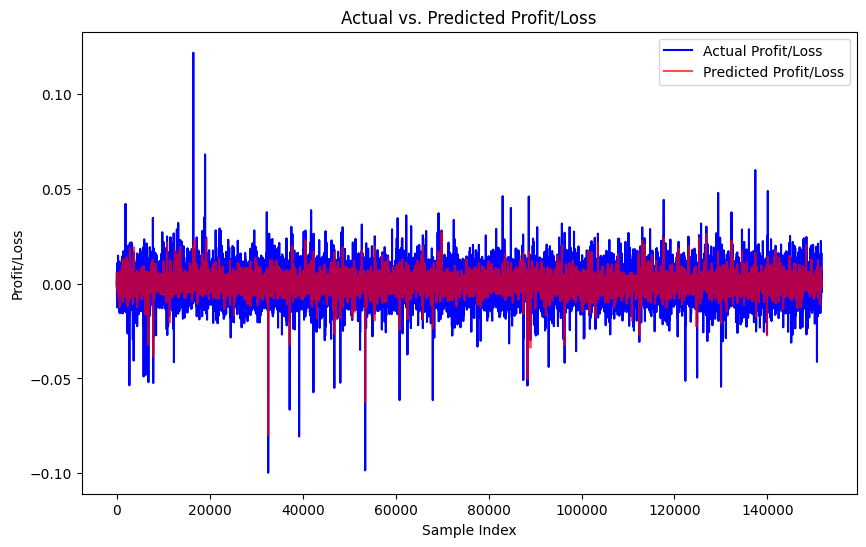

In [5]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


ticker = 'AAPL'

df = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/New100Packets/{ticker}_data.csv")
#print(df.head())

X = df.drop(columns=['Profit'])
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'colsample_bytree': 0.6,
    'gamma': 0,
    'learning_rate': 0.2,
    'max_depth': 10,
    'min_child_weight': 3,
    'n_estimators': 300,
    'subsample': 0.8
}

# Train the model
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=300, 
                  evals=[(dtest, 'test')], 
                  early_stopping_rounds=10)

# Make predictions
predictions = model.predict(dtest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

results_df = pd.DataFrame({
    'Actual Profit/Loss': y_test.values,
    'Predicted Profit/Loss': predictions,
    'RMSE': [rmse] * len(y_test)  # Repeat the RMSE value for each row
})

# Display the DataFrame
with pd.ExcelWriter('results100packet.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Sheet1', index=False)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Profit/Loss', color='blue')
plt.plot(predictions, label='Predicted Profit/Loss', color='red', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Profit/Loss')
plt.title('Actual vs. Predicted Profit/Loss')
plt.legend()
plt.show()

# Compare small data to large data

C:\Users\rybot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [01:02:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:0.00296
[1]	train-rmse:0.00291
[2]	train-rmse:0.00284
[3]	train-rmse:0.00280
[4]	train-rmse:0.00276
[5]	train-rmse:0.00273
[6]	train-rmse:0.00271
[7]	train-rmse:0.00268
[8]	train-rmse:0.00265
[9]	train-rmse:0.00263
[10]	train-rmse:0.00262
[11]	train-rmse:0.00260
[12]	train-rmse:0.00259
[13]	train-rmse:0.00258
[14]	train-rmse:0.00256
[15]	train-rmse:0.00253
[16]	train-rmse:0.00252
[17]	train-rmse:0.00250
[18]	train-rmse:0.00249
[19]	train-rmse:0.00246
[20]	train-rmse:0.00246
[21]	train-rmse:0.00243
[22]	train-rmse:0.00239
[23]	train-rmse:0.00236
[24]	train-rmse:0.00234
[25]	train-rmse:0.00233
[26]	train-rmse:0.00231
[27]	train-rmse:0.00229
[28]	train-rmse:0.00228
[29]	train-rmse:0.00228
[30]	train-rmse:0.00226
[31]	train-rmse:0.00224
[32]	train-rmse:0.00223
[33]	train-rmse:0.00221
[34]	train-rmse:0.00220
[35]	train-rmse:0.00219
[36]	train-rmse:0.00218
[37]	train-rmse:0.00217
[38]	train-rmse:0.00216
[39]	train-rmse:0.00214
[40]	train-rmse:0.00213
[41]	train-rmse:0.00213
[4

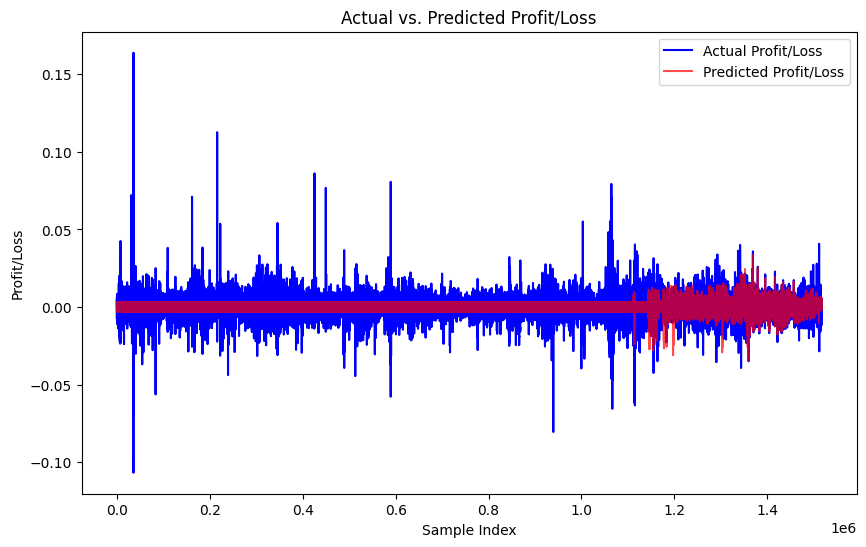

In [13]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Load the smaller dataset for training
size = 100
df_train = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/Packet CSV files/packet{size}.csv")

# Load the larger dataset for testing
ticker = 'AAPL'
df_test = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/New100Packets/{ticker}_data.csv")
df_test =df_test.drop(columns=["Profit Index", "Index"])

# Define features (X) and target (y) for training
X_train = df_train.drop(columns=['Profit'])
y_train = df_train['Profit']

# Define features (X) and target (y) for testing
X_test = df_test.drop(columns=['Profit'])
y_test = df_test['Profit']

# Convert the datasets to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'colsample_bytree': 0.6,
    'gamma': 0,
    'learning_rate': 0.2,
    'max_depth': 10,
    'min_child_weight': 3,
    'n_estimators': 300,
    'subsample': 0.8
}

# Train the model on the smaller dataset
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=300, 
                  evals=[(dtrain, 'train')], 
                  early_stopping_rounds=10)

# Make predictions on the larger testing dataset
predictions = model.predict(dtest)



# Calculate RMSE for the larger dataset
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE on larger dataset: {rmse}")

# Save results to an Excel file
results_df = pd.DataFrame({
    'Actual Profit/Loss': y_test.values,
    'Predicted Profit/Loss': predictions,
    'RMSE': [rmse] * len(y_test)  # Repeat the RMSE value for each row
})

# Save the results
print(results_df.info())
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Profit/Loss', color='blue')
plt.plot(predictions, label='Predicted Profit/Loss', color='red', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Profit/Loss')
plt.title('Actual vs. Predicted Profit/Loss')
plt.legend()
plt.show()


In [16]:

with open('output.csv', 'w') as file:
    results_df.to_csv(file, index=False) 

In [ ]:
# Load the larger dataset for testing
ticker = 'AAPL'
df_test = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/New100Packets/{ticker}_data.csv")
df_test =df_test.drop(columns=["Profit Index", "Index"])

X_test = df_test.drop(columns=['Profit'])
y_test = df_test['Profit']

dtest = xgb.DMatrix(X_test, label=y_test)

predictions = model.predict(dtest)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE on larger dataset: {rmse}")

# Save results to an Excel file
results_df = pd.DataFrame({
    'Actual Profit/Loss': y_test.values,
    'Predicted Profit/Loss': predictions,
    'RMSE': [rmse] * len(y_test)  # Repeat the RMSE value for each row
})

print(results_df.info())

# Testing A Bunch of different models

Linear Regression RMSE: 0.0030591366734862204
Ridge Regression RMSE: 0.003058739532562147
Decision Tree RMSE: 0.0024366256681353504
Random Forest RMSE: 0.0015821372315146037
Gradient Boosting RMSE: 0.0028849730972355793
XGBoost RMSE: 0.002445768123728919

Best model: Random Forest with RMSE: 0.0015821372315146037


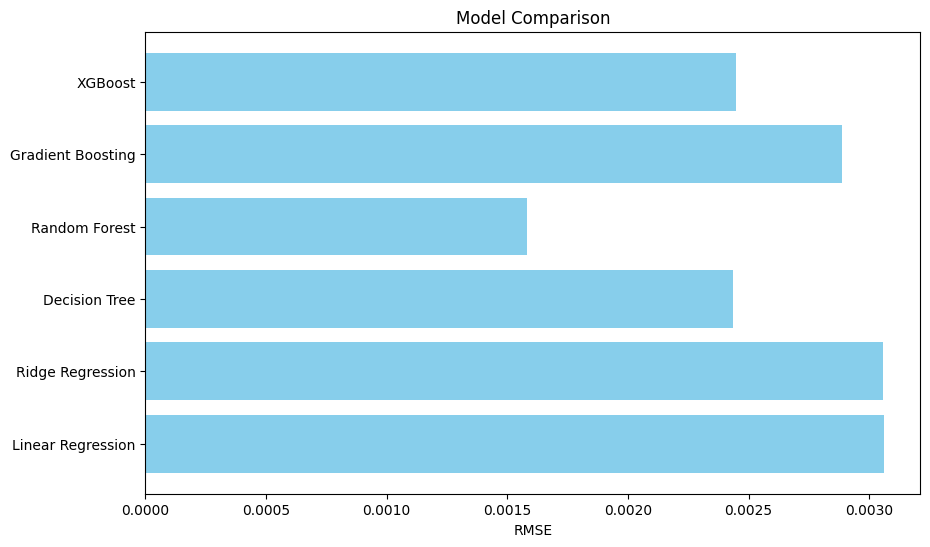

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load your dataset (use the training dataset in this example)
size = 100
df = pd.read_csv(f"C:/Users/rybot/OneDrive/Databases/Packet CSV files/packet{size}.csv")

# Define features (X) and target (y)
X = df.drop(columns=['Profit'])
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# Dictionary to store RMSE results
rmse_results = {}

# Loop through models, train, and evaluate each one
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Predict on the test set
    rmse = np.sqrt(mean_squared_error(y_test, predictions))  # Calculate RMSE
    rmse_results[name] = rmse  # Store RMSE
    print(f"{name} RMSE: {rmse}")

# Find the best model based on RMSE
best_model_name = min(rmse_results, key=rmse_results.get)
print(f"\nBest model: {best_model_name} with RMSE: {rmse_results[best_model_name]}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(list(rmse_results.keys()), list(rmse_results.values()), color='skyblue')
plt.xlabel("RMSE")
plt.title("Model Comparison")
plt.show()
